In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets\Chennai.csv")
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,chennai,2013-01-01T00:00:00,25.1,25.1,24.1,94.19,0.0,0,NaN,NaN,...,1010.8,50.0,6.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,43279099999
1,chennai,2013-01-01T01:00:00,25.1,25.1,24.1,94.19,0.0,0,NaN,NaN,...,1010.8,50.0,6.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,43279099999
2,chennai,2013-01-01T02:00:00,25.1,25.1,24.1,94.19,0.0,0,NaN,NaN,...,1010.2,50.0,6.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,43279099999
3,chennai,2013-01-01T03:00:00,24.3,24.3,22.2,88.08,0.0,0,NaN,NaN,...,NaN,66.4,NaN,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,remote
4,chennai,2013-01-01T04:00:00,24.1,24.1,24.1,100.00,0.0,0,NaN,NaN,...,1010.2,50.0,1.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,43279099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,chennai,2022-12-31T19:00:00,27.0,29.6,23.0,78.78,0.0,0,NaN,0.0,...,1015.0,27.4,6.0,6.0,0.0,0.0,3.0,Partially cloudy,partly-cloudy-night,"VOMM,43279099999"
87644,chennai,2022-12-31T20:00:00,24.9,24.9,21.2,79.62,0.0,0,NaN,0.0,...,1016.2,17.6,4.4,0.0,0.0,0.0,3.0,Clear,clear-night,"VOMM,43279099999,43278099999"
87645,chennai,2022-12-31T21:00:00,26.0,26.0,23.0,83.57,0.0,0,NaN,0.0,...,1016.0,27.4,5.0,0.0,0.0,0.0,3.0,Partially cloudy,partly-cloudy-night,"VOMM,43279099999"
87646,chennai,2022-12-31T22:00:00,26.0,26.0,23.0,83.57,0.0,0,NaN,0.0,...,1016.0,27.4,5.0,0.0,0.0,0.0,3.0,Partially cloudy,partly-cloudy-night,"VOMM,43279099999"


<Axes: xlabel='datetime'>

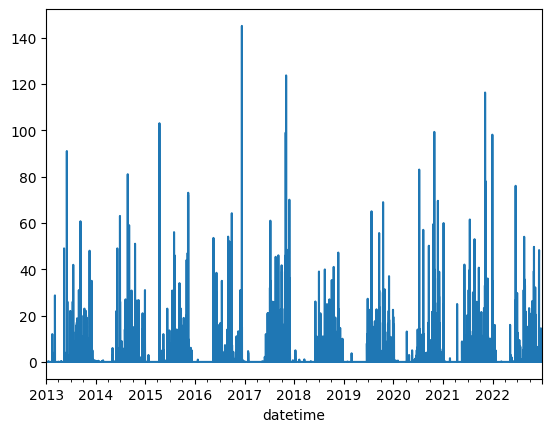

In [3]:
df.index = pd.to_datetime(df['datetime'])
precip = df['precip']
precip.plot()

In [4]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()

    X = []
    y = []

    for i in range(len(df_as_np) - window_size ):
        row = [[a] for a in df_as_np[i:i+window_size]]

        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)

    return np.array(X), np.array(y)

In [5]:
WINDOW_SIZE = 5
X, y = df_to_X_y(precip, WINDOW_SIZE)
X.shape, y.shape

((87643, 5, 1), (87643,))

In [6]:
trn_upper = int(len(precip) * 0.8)
valid_upper = int(len(precip) * 0.9)
upper = len(precip)

print(trn_upper,valid_upper,upper)

X_train, y_train = X[:trn_upper], y[:trn_upper]
X_val, y_val = X[trn_upper:valid_upper], y[trn_upper:valid_upper]
X_test, y_test = X[valid_upper:], y[valid_upper:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

70118 78883 87648


((70118, 5, 1), (70118,), (8765, 5, 1), (8765,), (8760, 5, 1), (8760,))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [8]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [9]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
2185/2192 [============================>.] - ETA: 0s - loss: 5.3656 - root_mean_squared_error: 2.3164

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 18s 7ms/step - loss: 5.3520 - root_mean_squared_error: 2.3134 - val_loss: 9.4219 - val_root_mean_squared_error: 3.0695
Epoch 2/10
2183/2192 [============================>.] - ETA: 0s - loss: 5.1994 - root_mean_squared_error: 2.2802

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 15s 7ms/step - loss: 5.1840 - root_mean_squared_error: 2.2768 - val_loss: 8.8557 - val_root_mean_squared_error: 2.9759
Epoch 3/10
2181/2192 [============================>.] - ETA: 0s - loss: 4.9264 - root_mean_squared_error: 2.2195

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 16s 7ms/step - loss: 5.0557 - root_mean_squared_error: 2.2485 - val_loss: 8.6479 - val_root_mean_squared_error: 2.9407
Epoch 4/10
2191/2192 [============================>.] - ETA: 0s - loss: 5.0173 - root_mean_squared_error: 2.2399

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 22s 10ms/step - loss: 5.0168 - root_mean_squared_error: 2.2398 - val_loss: 8.5166 - val_root_mean_squared_error: 2.9183
Epoch 5/10
2186/2192 [============================>.] - ETA: 0s - loss: 4.9436 - root_mean_squared_error: 2.2234

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 14s 6ms/step - loss: 5.0036 - root_mean_squared_error: 2.2369 - val_loss: 8.4955 - val_root_mean_squared_error: 2.9147
Epoch 6/10
2192/2192 [==============================] - ETA: 0s - loss: 4.9918 - root_mean_squared_error: 2.2342

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 13s 6ms/step - loss: 4.9918 - root_mean_squared_error: 2.2342 - val_loss: 8.4427 - val_root_mean_squared_error: 2.9056
Epoch 7/10
2192/2192 [==============================] - 11s 5ms/step - loss: 4.9844 - root_mean_squared_error: 2.2326 - val_loss: 8.5046 - val_root_mean_squared_error: 2.9163
Epoch 8/10
2189/2192 [============================>.] - ETA: 0s - loss: 4.9866 - root_mean_squared_error: 2.2331

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 13s 6ms/step - loss: 4.9833 - root_mean_squared_error: 2.2323 - val_loss: 8.4368 - val_root_mean_squared_error: 2.9046
Epoch 9/10
2192/2192 [==============================] - 11s 5ms/step - loss: 4.9774 - root_mean_squared_error: 2.2310 - val_loss: 8.4449 - val_root_mean_squared_error: 2.9060
Epoch 10/10
2182/2192 [============================>.] - ETA: 0s - loss: 4.9308 - root_mean_squared_error: 2.2206

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2192/2192 [==============================] - 13s 6ms/step - loss: 4.9726 - root_mean_squared_error: 2.2299 - val_loss: 8.3852 - val_root_mean_squared_error: 2.8957


In [10]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [11]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

2192/2192 [==============================] - 5s 2ms/step


,Train Predictions,Actuals
0,0.105631,0.0
1,0.105631,0.0
2,0.105631,0.0
3,0.105631,0.0
4,0.105631,0.0
...,...,...
70113,0.105627,0.0
70114,0.105627,0.0
70115,0.105627,0.0
70116,0.105627,0.0


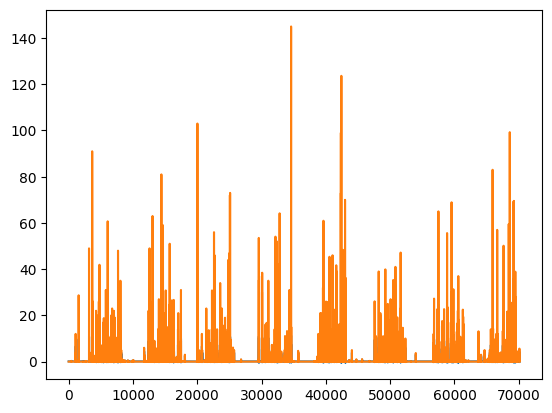

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

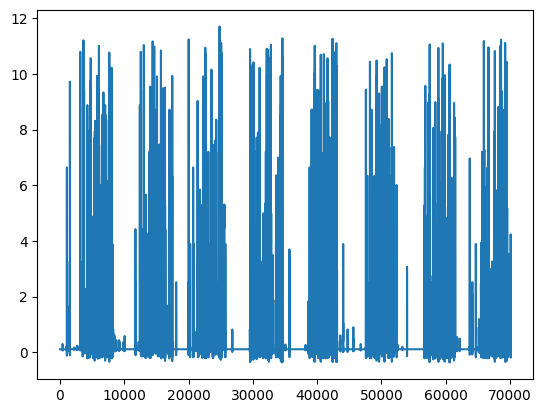

In [13]:
plt.plot(train_results['Train Predictions'])

In [15]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val predictions': val_predictions, 'actual':y_val})
val_results

274/274 [==============================] - 1s 2ms/step


,Val predictions,actual
0,0.105631,0.0
1,0.105631,0.0
2,0.105631,0.0
3,0.105631,0.0
4,0.105631,0.0
...,...,...
8760,-0.350543,0.0
8761,8.961805,0.0
8762,0.058754,0.0
8763,0.084936,0.0


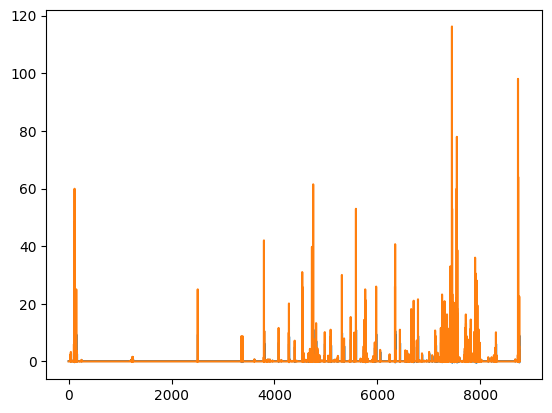

In [16]:
plt.plot(val_results['Val predictions'])
plt.plot(val_results['actual'])

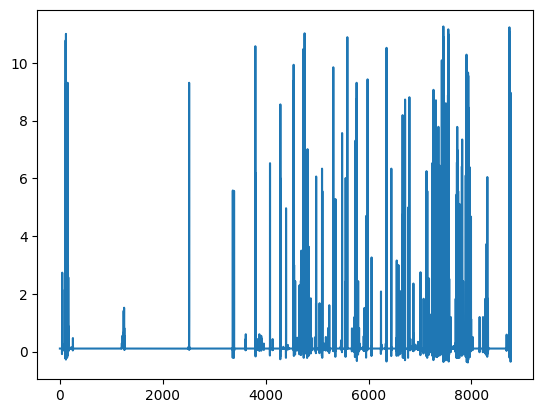

In [17]:
plt.plot(val_results['Val predictions'])

In [19]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test predictions': test_predictions, 'actual':y_test})
test_results

274/274 [==============================] - 1s 3ms/step


,Test predictions,actual
0,0.105631,0.0
1,0.105631,0.0
2,0.105631,0.0
3,0.105631,0.0
4,0.105631,0.0
...,...,...
8755,0.105631,0.0
8756,0.105631,0.0
8757,0.105631,0.0
8758,0.105631,0.0


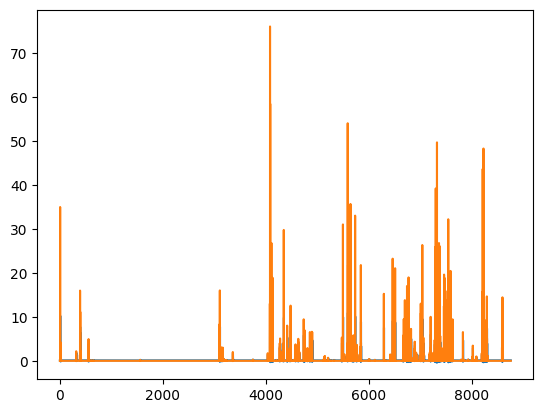

In [20]:
plt.plot(test_results['Test predictions'])
plt.plot(test_results['actual'])

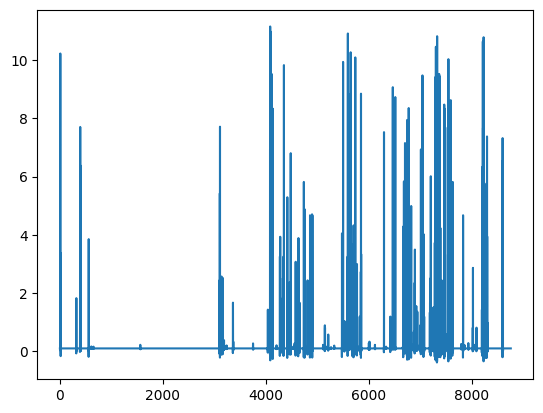

In [21]:
plt.plot(test_results['Test predictions'])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = test_results['Test predictions']
actual = test_results['actual']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.34971531907069797
Mean Squared Error (MSE): 4.352757051099474
Root Mean Squared Error (RMSE): 2.0863262091771446


# boolean prediciton

In [23]:
precip.head()

datetime
2018-01-01 00:00:00    0.0
2018-01-01 01:00:00    0.0
2018-01-01 02:00:00    0.0
2018-01-01 03:00:00    0.0
2018-01-01 04:00:00    0.0
Name: precip, dtype: float64

In [24]:
df['precip'] = df['precip'].apply(lambda x: 1 if x > 0 else 0)
precip_bool = df['precip']
precip_bool

datetime
2018-01-01 00:00:00    0
2018-01-01 01:00:00    0
2018-01-01 02:00:00    0
2018-01-01 03:00:00    0
2018-01-01 04:00:00    0
                      ..
2022-12-31 19:00:00    0
2022-12-31 20:00:00    0
2022-12-31 21:00:00    0
2022-12-31 22:00:00    0
2022-12-31 23:00:00    0
Name: precip, Length: 43824, dtype: int64

<Axes: xlabel='datetime'>

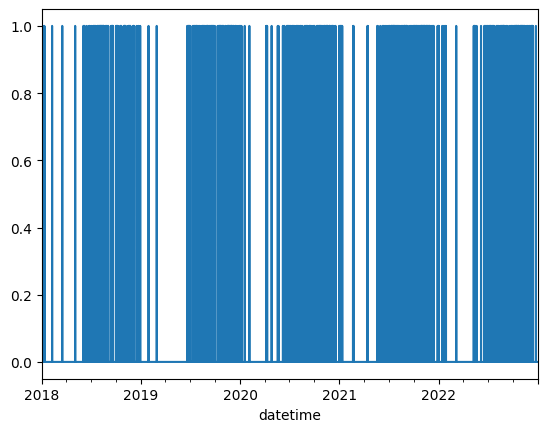

In [25]:
precip_bool.plot()

In [26]:
WINDOW_SIZE = 50
X, y = df_to_X_y(precip, WINDOW_SIZE)
X.shape, y.shape

trn_upper = int(len(precip) * 0.8)
valid_upper = int(len(precip) * 0.9)
upper = len(precip)

print(trn_upper,valid_upper,upper)

X_train, y_train = X[:trn_upper], y[:trn_upper]
X_val, y_val = X[trn_upper:valid_upper], y[trn_upper:valid_upper]
X_test, y_test = X[valid_upper:], y[valid_upper:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

35059 39441 43824


((35059, 50, 1), (35059,), (4382, 50, 1), (4382,), (4333, 50, 1), (4333,))

In [33]:
model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [34]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [35]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10


1096/1096 [==============================] - 20s 17ms/step - loss: 5.5989 - root_mean_squared_error: 2.3662 - val_loss: 2.8566 - val_root_mean_squared_error: 1.6901
Epoch 2/10
1096/1096 [==============================] - 18s 16ms/step - loss: 5.5069 - root_mean_squared_error: 2.3467 - val_loss: 2.8275 - val_root_mean_squared_error: 1.6815
Epoch 3/10
1096/1096 [==============================] - 18s 17ms/step - loss: 5.4556 - root_mean_squared_error: 2.3357 - val_loss: 2.7913 - val_root_mean_squared_error: 1.6707
Epoch 4/10
1096/1096 [==============================] - 20s 18ms/step - loss: 5.3999 - root_mean_squared_error: 2.3238 - val_loss: 2.7535 - val_root_mean_squared_error: 1.6594
Epoch 5/10
1096/1096 [==============================] - 20s 18ms/step - loss: 5.3519 - root_mean_squared_error: 2.3134 - val_loss: 2.7218 - val_root_mean_squared_error: 1.6498
Epoch 6/10
1096/1096 [==============================] - 20s 18ms/step - loss: 5.3029 - root_mean_squared_error: 2.3028 - val_loss: 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1096/1096 [==============================] - 24s 22ms/step - loss: 5.2603 - root_mean_squared_error: 2.2935 - val_loss: 2.6618 - val_root_mean_squared_error: 1.6315
Epoch 8/10
1095/1096 [============================>.] - ETA: 0s - loss: 5.2051 - root_mean_squared_error: 2.2815

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1096/1096 [==============================] - 22s 20ms/step - loss: 5.2023 - root_mean_squared_error: 2.2809 - val_loss: 2.6253 - val_root_mean_squared_error: 1.6203
Epoch 9/10
1095/1096 [============================>.] - ETA: 0s - loss: 5.1580 - root_mean_squared_error: 2.2711

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1096/1096 [==============================] - 20s 19ms/step - loss: 5.1552 - root_mean_squared_error: 2.2705 - val_loss: 2.5994 - val_root_mean_squared_error: 1.6123
Epoch 10/10
1095/1096 [============================>.] - ETA: 0s - loss: 5.1073 - root_mean_squared_error: 2.2599

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1096/1096 [==============================] - 21s 19ms/step - loss: 5.1046 - root_mean_squared_error: 2.2593 - val_loss: 2.5583 - val_root_mean_squared_error: 1.5995


In [37]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

OSError: No file or directory found at model2/

In [39]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1096/1096 [==============================] - 14s 12ms/step


,Train Predictions,Actuals
0,0.070254,0.0
1,0.070254,0.0
2,0.070254,0.0
3,0.070254,0.0
4,0.070254,0.0
...,...,...
35054,0.381369,0.0
35055,0.363198,0.0
35056,0.352553,0.0
35057,0.342421,0.0


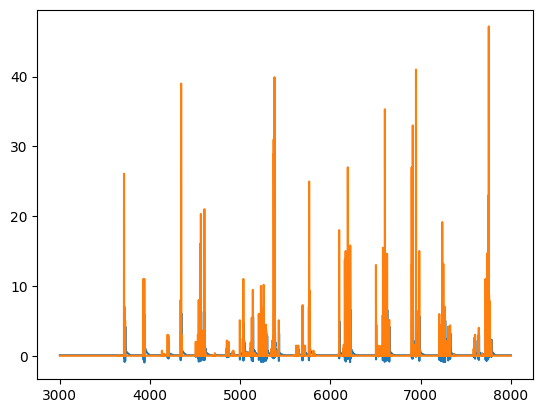

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][3000:8000])
plt.plot(train_results['Actuals'][3000:8000])

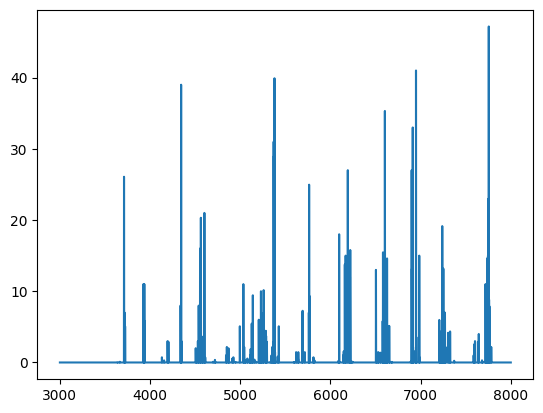

In [42]:
plt.plot(train_results['Actuals'][3000:8000])

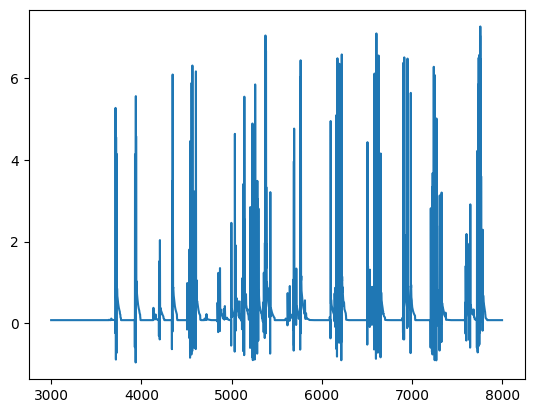

In [43]:
plt.plot(train_results['Train Predictions'][3000:8000])